# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [14]:
import kagglehub
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [15]:
# Download latest version
path = kagglehub.dataset_download("yasserh/wine-quality-dataset")

print("Path to dataset files:", path)
# Load dataset
csv_file = os.path.join(path, "WineQT.csv")

# Membaca dataset menggunakan pandas
df = pd.read_csv(csv_file)
print("Dataset berhasil di-load!")
print(df.head())

Path to dataset files: C:\Users\faiz\.cache\kagglehub\datasets\yasserh\wine-quality-dataset\versions\1
Dataset berhasil di-load!
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0          

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

cek baris dan kolom

In [16]:
df.shape

(1143, 13)

Cek tipe data dan missing values

In [17]:

print("\n--- Info Data ---")
df.info()


--- Info Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Statistik Deskriptif

In [18]:
print("\n--- Statistik Deskriptif ---")
display(df.describe())


--- Statistik Deskriptif ---


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Analisis Target Variable

C:\Users\faiz\AppData\Local\Temp\ipykernel_23492\2751151415.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


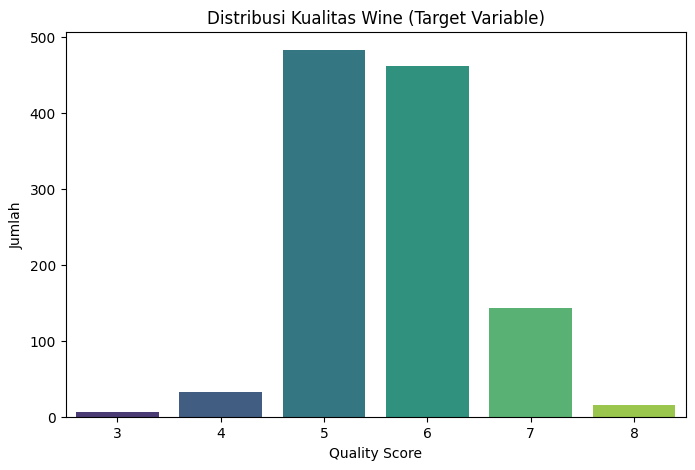

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribusi Kualitas Wine (Target Variable)')
plt.xlabel('Quality Score')
plt.ylabel('Jumlah')
plt.show()

Korelasi Antar Fitur (Multivariate Analysis)

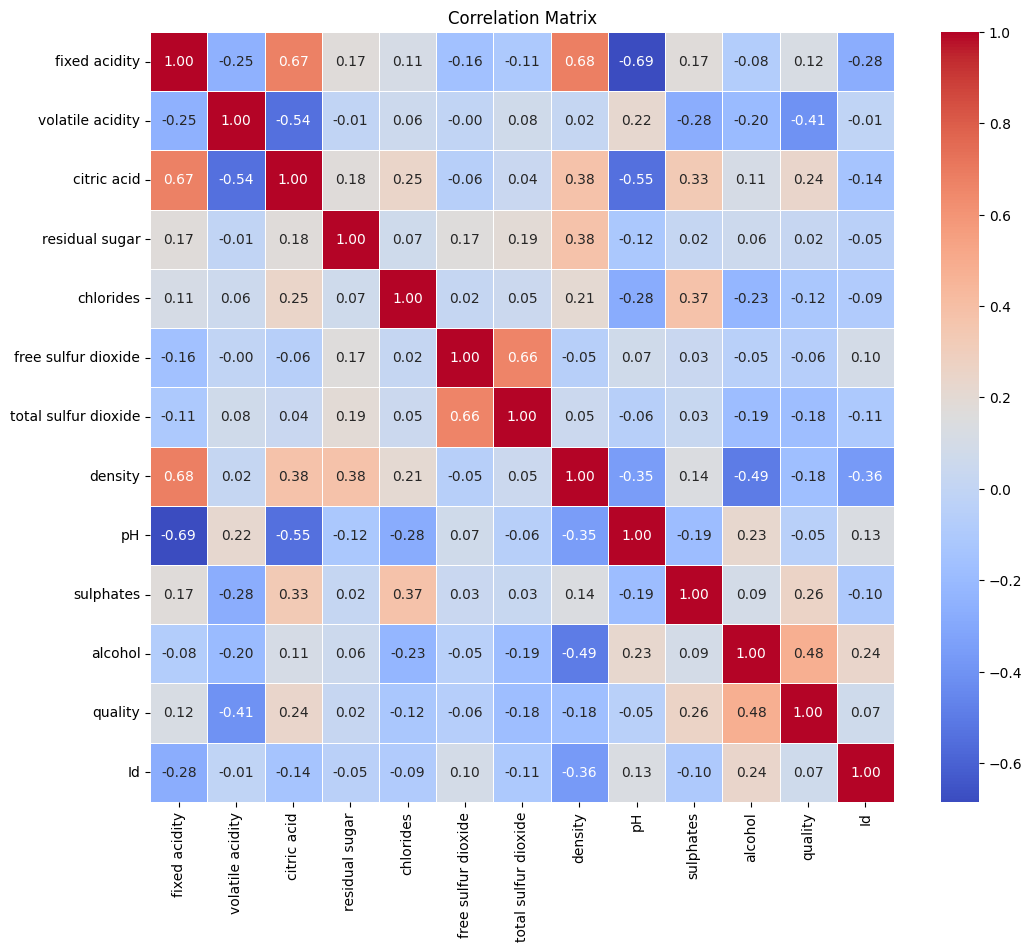


--- Korelasi Fitur terhadap Quality ---
quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


In [20]:
plt.figure(figsize=(12, 10))
# Menghitung korelasi
correlation = df.corr()

# Plot Heatmap
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Zoom in: Korelasi fitur terhadap 'quality' saja
print("\n--- Korelasi Fitur terhadap Quality ---")
print(correlation['quality'].sort_values(ascending=False))

C:\Users\faiz\AppData\Local\Temp\ipykernel_23492\1629470985.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=df, palette='viridis')


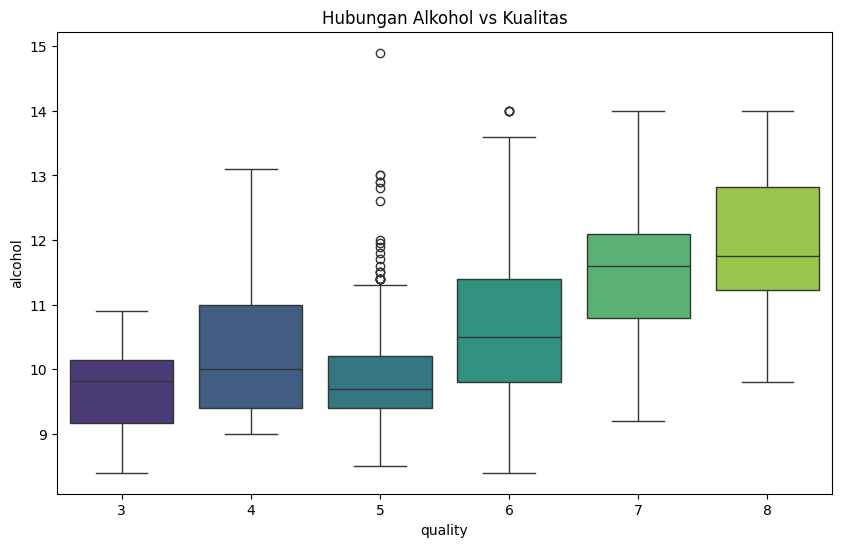

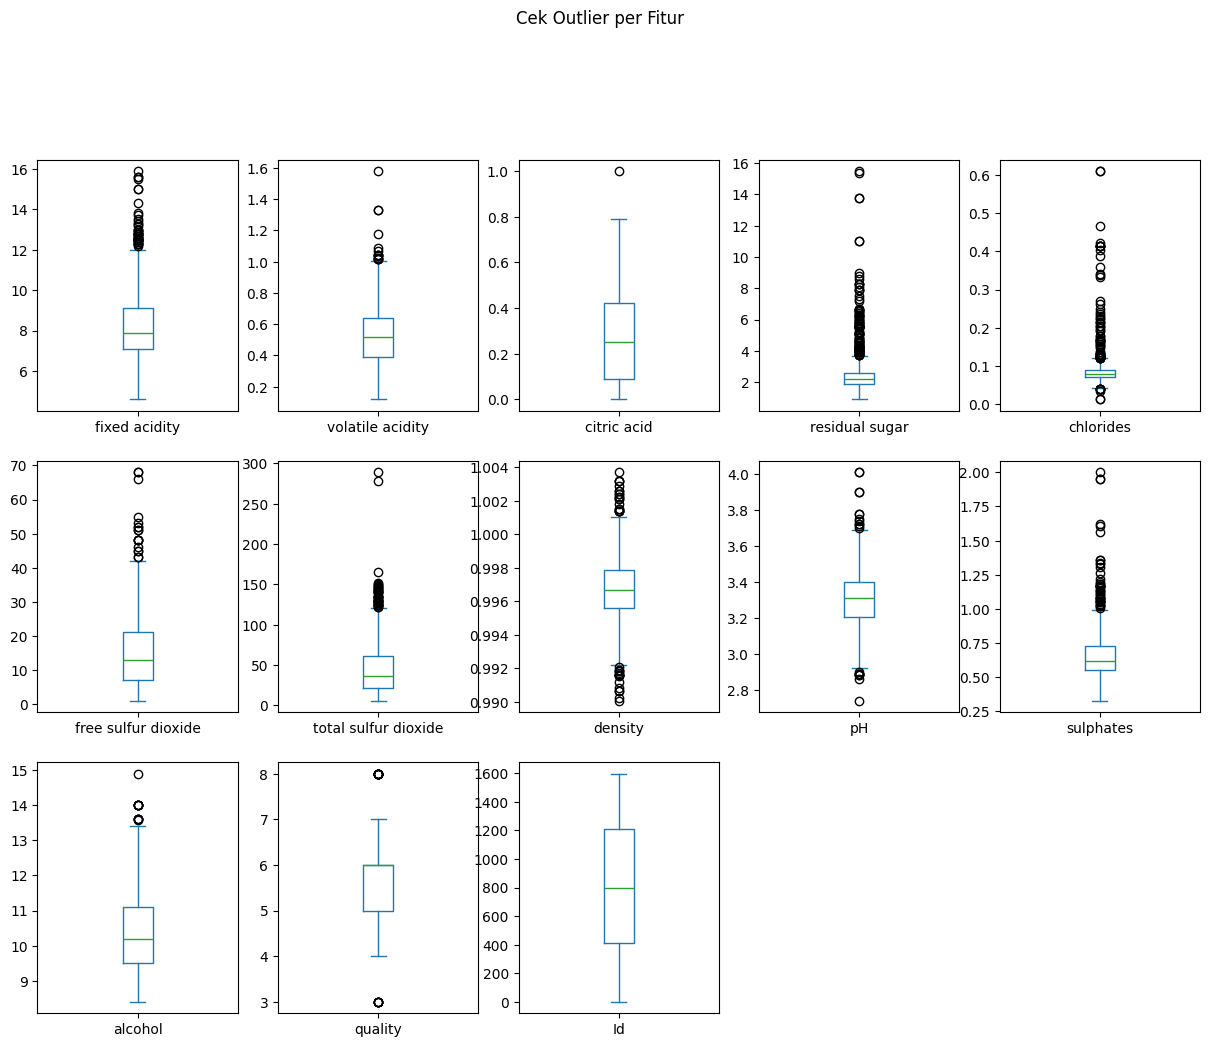

In [21]:
# Contoh melihat hubungan Alcohol vs Quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=df, palette='viridis')
plt.title('Hubungan Alkohol vs Kualitas')
plt.show()

# Melihat Outlier di semua fitur numerik
df.plot(kind='box', subplots=True, layout=(4,5), figsize=(15,15), title='Cek Outlier per Fitur')
plt.show()

Cek Missing Value

In [22]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Cek data duplicated

In [23]:
df.duplicated().sum()

0

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

Menghilangkan ID 

In [24]:
# Cek apakah ada kolom Id
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)
    print("Kolom 'Id' berhasil dibuang.")

# Cek Duplikasi
duplicates = df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

# Opsional: Buang duplikat jika dianggap perlu (untuk MLOps, data bersih itu raja)
df = df.drop_duplicates()

df.info()

Kolom 'Id' berhasil dibuang.
Jumlah data duplikat: 125
<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1018 non-null   float64
 1   volatile acidity      1018 non-null   float64
 2   citric acid           1018 non-null   float64
 3   residual sugar        1018 non-null   float64
 4   chlorides             1018 non-null   float64
 5   free sulfur dioxide   1018 non-null   float64
 6   total sulfur dioxide  1018 non-null   float64
 7   density               1018 non-null   float64
 8   pH                    1018 non-null   float64
 9   sulphates             1018 non-null   float64
 10  alcohol               1018 non-null   float64
 11  quality               1018 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 103.4 KB


outlier

In [25]:
features = df.columns.drop('quality')

Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

# Filter: Simpan baris yang TIDAK outlier ke variabel df lagi (overwrite)
condition = ~((df[features] < (Q1 - 1.5 * IQR)) | (df[features] > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[condition].copy()


Standarisasi


In [26]:
scaler = StandardScaler()
# Kita update kolom fitur di df dengan nilai yang sudah diskalakan
df[features] = scaler.fit_transform(df[features])

# Cek hasil (hanya menampilkan 5 baris pertama)
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.489744          0.989038    -1.351256       -0.666139  -0.162272   
1      -0.205267          2.042897    -1.351256        0.884425   1.361671   
2      -0.205267          1.340325    -1.127403        0.219898   0.946050   
3       2.212783         -1.469966     1.782674       -0.666139  -0.231542   
5      -0.489744          0.754847    -1.351256       -0.887648  -0.231542   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.443968             -0.324972  0.793813  1.376362  -0.622832   
1             1.168024              0.927135  0.174907 -0.934104   0.444880   
2             0.016601              0.433881  0.298688 -0.486917   0.177952   
3             0.246886              0.661537  0.917595 -1.232229  -0.444880   
5            -0.213683             -0.097316  0.793813  1.376362  -0.622832   

    alcohol  quality  
0 -0.984837        5  
1 -0.58452

simpan csv

In [27]:
df.to_csv('wine_quality_preprocessed.csv', index=False)
print("\nFile berhasil disimpan: 'wine_quality_preprocessed.csv'")


File berhasil disimpan: 'wine_quality_preprocessed.csv'
